In [1]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates
from tqdm import tqdm

# Advanced plotting functionality with seaborn
import seaborn as sns
#import folium  #needed for interactive map
#from folium.plugins import HeatMap
#from folium.plugins import FastMarkerCluster

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

In [10]:
!pip install tqdm

    100% |████████████████████████████████| 81kB 5.3MB/s ta 0:00:01


In [11]:
!pip install folium

    100% |████████████████████████████████| 102kB 5.2MB/s a 0:00:011


## Import Dataframe

In [2]:
df = pd.read_csv('FimaNfipClaims.csv')

/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

In [4]:
df[['amountPaidOnBuildingClaim','amountPaidOnContentsClaim','amountPaidOnIncreasedCostOfComplianceClaim','totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage']]

,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage
0,47601.75,64.36,NaN,125300.0,5000.0
1,NaN,NaN,NaN,250000.0,100000.0
2,3743.72,893.10,NaN,250000.0,100000.0
3,34500.00,NaN,NaN,34500.0,0.0
4,18703.10,NaN,NaN,250000.0,100000.0
...,...,...,...,...,...
2502811,6018.95,NaN,NaN,78000.0,0.0
2502812,6931.21,NaN,NaN,130700.0,0.0
2502813,13686.86,NaN,NaN,29000.0,0.0
2502814,69919.61,19549.61,NaN,75000.0,23000.0


In [9]:
df['amountPaidOnContentsClaim'].describe()

count    939285.000000
mean      14560.209967
std       29681.015047
min      -41276.320000
25%        1434.960000
50%        5069.210000
75%       15949.710000
max      750000.000000
Name: amountPaidOnContentsClaim, dtype: float64

## Cleaning

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
df['state'].value_counts().plot(ax=ax, kind='bar')
ax.tick_params(axis='x', rotation=45)
sum(df['state'].value_counts())
#ASSUMPTION: only two are nans, so we can filter by louisiana without risking losing too much
#data, not risking any 

In [ ]:
louisiana = df[(df['yearOfLoss'].isin(range(2005, 2008))) & (df['state']=='LA')]
louisiana

### Other Cleaning

In [ ]:
#creating pandas-recognized datetime column and then filtering for within a few months of Katrina.

louisiana['dateTimeOfLoss'] = pd.to_datetime(louisiana['dateOfLoss'], infer_datetime_format=True)
louisiana_katrina = louisiana[(louisiana['dateTimeOfLoss'] > "2005-08-10") & (louisiana['dateTimeOfLoss'] < "2006-02-01")]

In [ ]:
pd.set_option('max_columns', None)
louisiana_katrina
#pd.reset_option('max_columns')

In [ ]:
#dropping all rows that have nas for reported zipcode (financial data) and then casting to int.
louisiana_katrina = louisiana_katrina.dropna(subset = ['reportedZipcode'])
louisiana_katrina['reportedZipcode'] = louisiana_katrina['reportedZipcode'].apply(lambda zipcode: int(zipcode))

In [ ]:
louisiana_katrina.isna().sum()

In [ ]:
louisiana_katrina.to_csv('semiclean_katrina_louisiana_FIMA_NFIP.csv')

## EDA

In [10]:
louisiana_katrina = pd.read_csv('semiclean_katrina_louisiana_FIMA_NFIP.csv')
louisiana_katrina['dateTimeOfLoss'] = pd.to_datetime(louisiana_katrina['dateOfLoss'], infer_datetime_format=True)

/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
louisiana_katrina

,Unnamed: 0,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,...,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id,dateTimeOfLoss
0,919,0.0,2020-11-22T00:53:40.710Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,...,1,0.0,LA,163400.0,220500.0,2005,70062,0.0,5fc65baef54611084d40ea08,2005-08-29 04:00:00+00:00
1,1345,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,HARAHAN,N,1.0,22051.0,8.0,...,1,0.0,LA,200000.0,100000.0,2005,70123,0.0,5fc65baef54611084d40eb65,2005-08-29 04:00:00+00:00
2,1447,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,...,1,0.0,LA,117000.0,38600.0,2005,70458,0.0,5fc65baef54611084d40ec0f,2005-08-29 04:00:00+00:00
3,2256,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,...,7,0.0,LA,250000.0,100000.0,2005,70118,1.0,5fc65baff54611084d40ef57,2005-08-29 04:00:00+00:00
4,2320,0.0,2020-11-22T00:53:40.710Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,...,7,0.0,LA,100000.0,40000.0,2005,70122,0.0,5fc65baff54611084d40ef89,2005-08-29 04:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188773,2502600,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,JEFFERSON,N,1.0,22051.0,5.0,...,1,0.0,LA,100000.0,15700.0,2005,70121,1.0,5fc65dd3f54611084d671685,2005-08-29 04:00:00+00:00
188774,2502610,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,...,1,0.0,LA,91300.0,21000.0,2005,70126,1.0,5fc65dd3f54611084d671660,2005-08-29 04:00:00+00:00
188775,2502623,0.0,2020-11-22T00:53:40.710Z,NaN,NaN,KENNER,N,1.0,22051.0,7.0,...,1,0.0,LA,50000.0,10000.0,2005,70065,1.0,5fc65dd3f54611084d671686,2005-08-29 04:00:00+00:00
188776,2502642,0.0,2020-11-22T00:53:40.710Z,9.0,NaN,NEW IBERIA,N,1.0,22045.0,NaN,...,1,0.0,LA,50000.0,0.0,2005,70560,1.0,5fc65dd3f54611084d6716ae,2005-09-24 04:00:00+00:00


In [3]:
folium_map = folium.Map(location=[31.298430, -92.469646],
                        zoom_start=7,
                        tiles="Stamen Terrain")
#Now we can have a scatter plot of the first 1000 data points on the above map
'''for _, listings in tqdm(louisiana_katrina.iterrows()):
    if np.isnan(listings['latitude']):
        continue
    marker = folium.CircleMarker(location=[listings["latitude"],listings["longitude"]],radius=5,color="r",fill=True)
    marker.add_to(folium_map)'''



folium_map.add_child(FastMarkerCluster(louisiana_katrina[~(louisiana_katrina['latitude'].isna())][['latitude', 'longitude']].values.tolist()))


folium_map

NameError: name 'folium' is not defined

In [16]:
counts = louisiana_katrina.copy()
counts['count'] = 1
counts = counts.groupby(['reportedZipcode']).count()['count'].reset_index().set_index('reportedZipcode')
counts = counts.sort_values(by='reportedZipcode')
counts

,count
reportedZipcode,
70000,2
70001,5510
70002,4450
70003,8433
70004,4
...,...
71409,1
71423,1
71433,1


In [27]:
amounts = louisiana_katrina.copy()
amounts = amounts.groupby(['reportedZipcode']).sum()[['amountPaidOnBuildingClaim','amountPaidOnContentsClaim']].reset_index().set_index('reportedZipcode')
amounts = amounts.sort_values(by='reportedZipcode')
merged_counts = counts.reset_index().merge(amounts.reset_index()).set_index('reportedZipcode').sort_values(by='reportedZipcode')

In [28]:
merged_counts.to_csv('LA_NFIP_claims_counts.csv')

In [29]:
merged = pd.read_csv('merged_socioeconomic_katrina_data.csv')
merged = merged.drop(columns=[merged.columns[0], merged.columns[1]])

In [30]:
#to make float
floats = ['IncomeBucket1', 'IncomeBucket2', 'IncomeBucket3', 'IncomeBucket4', 'IncomeBucket5',
       'IncomeBucket6', 'IncomeBucket7', 'IncomeBucket8', 'IncomeBucket9',
       'MedianHHIncome', 'MeanHHIncome']
for col in floats:
    print(col)
    merged[col] = merged[col].apply(lambda x: float(x) if x != '-' and x != 'N' else None)

IncomeBucket1
IncomeBucket2
IncomeBucket3
IncomeBucket4
IncomeBucket5
IncomeBucket6
IncomeBucket7
IncomeBucket8
IncomeBucket9
MedianHHIncome
MeanHHIncome


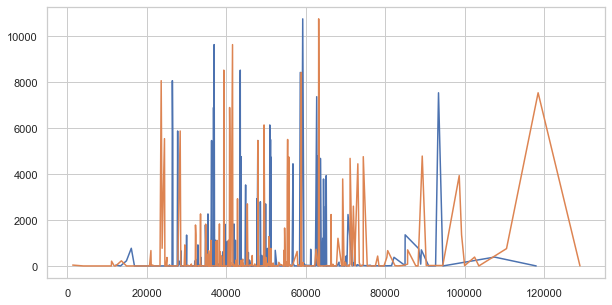

In [31]:
plt.figure(figsize=(10, 5))
by_median = merged.sort_values(by='MedianHHIncome')
by_mean = merged.sort_values(by='MeanHHIncome')
plt.plot(by_median['MedianHHIncome'], by_median['count'])
plt.plot(by_mean['MeanHHIncome'] - (61784.726000000002 - 46008.64904862579), by_mean['count'])

In [32]:
by_median['MedianHHIncome'].sum()/by_median['MedianHHIncome'].count()

46008.64904862579

<AxesSubplot:ylabel='Frequency'>

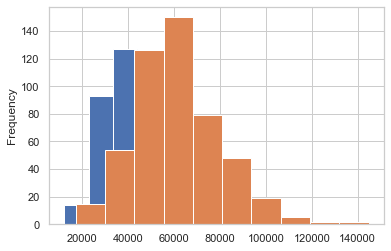

In [33]:
by_median['MedianHHIncome'].plot.hist()
by_mean['MeanHHIncome'].plot.hist()

In [20]:
sns.displot(merged, x=['MedianHHIncome', 'MeanHHIncome'], hue="count")

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sns.__version__

In [34]:
merged.columns

Index(['IncomeBucket1', 'IncomeBucket2', 'IncomeBucket3', 'IncomeBucket4',
       'IncomeBucket5', 'IncomeBucket6', 'IncomeBucket7', 'IncomeBucket8',
       'IncomeBucket9', 'MedianHHIncome', 'MeanHHIncome', 'PercInsured',
       'TotalPop', 'SexRatio', 'MedianAge', 'PercPopUnder18', 'PercPopOver65',
       'PercWhite', 'PercBlack', 'PercAsian', 'PercLatino', 'HousingUnits',
       'UnempRate', 'Pop', 'ZipArea', 'Density', 'BachelorsRate', 'count',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim'],
      dtype='object')

In [35]:
merged.corr() #include weighted amount of nfip claim amounts, meaning of filing for claim

,IncomeBucket1,IncomeBucket2,IncomeBucket3,IncomeBucket4,IncomeBucket5,IncomeBucket6,IncomeBucket7,IncomeBucket8,IncomeBucket9,MedianHHIncome,...,PercLatino,HousingUnits,UnempRate,Pop,ZipArea,Density,BachelorsRate,count,amountPaidOnBuildingClaim,amountPaidOnContentsClaim
IncomeBucket1,1.000000,0.130957,0.072306,-0.043425,-0.150602,-0.387267,-0.283801,-0.365172,-0.246351,-0.655808,...,-0.129899,-0.086295,0.247649,-0.097221,-0.002353,0.042058,-0.137748,-0.024417,0.032126,0.010653
IncomeBucket2,0.130957,1.000000,0.011435,0.008981,-0.066184,-0.266539,-0.225609,-0.284736,-0.150074,-0.510394,...,-0.105095,-0.090287,0.180066,-0.096454,0.077434,-0.033872,-0.142375,-0.033779,0.001411,-0.015604
IncomeBucket3,0.072306,0.011435,1.000000,-0.019400,-0.095320,-0.109852,-0.268338,-0.272350,-0.302097,-0.591882,...,-0.080039,-0.105269,0.134372,-0.106515,0.058610,-0.042389,-0.172776,-0.059997,-0.030125,-0.035020
IncomeBucket4,-0.043425,0.008981,-0.019400,1.000000,-0.062877,-0.107967,-0.205004,-0.257969,-0.148402,-0.402332,...,0.030756,-0.042942,0.028004,-0.043631,0.032551,-0.037327,-0.099795,-0.026267,-0.020095,-0.023918
IncomeBucket5,-0.150602,-0.066184,-0.095320,-0.062877,1.000000,-0.140526,-0.101833,-0.104548,-0.172760,-0.117330,...,0.039463,-0.035070,0.052727,-0.032870,-0.019317,-0.034862,-0.060798,-0.017219,-0.019162,-0.013270
IncomeBucket6,-0.387267,-0.266539,-0.109852,-0.107967,-0.140526,1.000000,-0.049771,0.099447,-0.014598,0.331838,...,0.026034,0.039352,-0.176671,0.047632,0.006459,-0.005101,0.039808,0.019859,-0.039432,-0.020089
IncomeBucket7,-0.283801,-0.225609,-0.268338,-0.205004,-0.101833,-0.049771,1.000000,0.070979,0.055126,0.511084,...,0.154899,-0.004842,-0.228547,0.006468,-0.056405,-0.037754,0.031847,0.007651,-0.014916,0.008041
IncomeBucket8,-0.365172,-0.284736,-0.272350,-0.257969,-0.104548,0.099447,0.070979,1.000000,0.117563,0.666641,...,0.021647,0.124922,-0.072871,0.134402,0.008196,-0.008637,0.200655,0.034915,-0.018317,-0.002297
IncomeBucket9,-0.246351,-0.150074,-0.302097,-0.148402,-0.172760,-0.014598,0.055126,0.117563,1.000000,0.612179,...,0.023366,0.091445,-0.158500,0.092616,-0.064777,0.028551,0.161384,0.036844,0.023978,0.027462
MedianHHIncome,-0.655808,-0.510394,-0.591882,-0.402332,-0.117330,0.331838,0.511084,0.666641,0.612179,1.000000,...,0.112219,0.167846,-0.352104,0.178269,-0.150582,0.045947,0.339938,0.072173,0.009023,0.025291


## Tract Data + NFHL Risk Factors

In [41]:
nfhl_to_zip = pd.read_csv('nfhl_to_zip.csv')

In [43]:
nfhl_to_zip.head()

,FLD_ZONE,ZONE_SUBTY,SFHA_TF,SHAPE_Area,GEOID,Tract,RISK
0,X,AREA OF MINIMAL FLOOD HAZARD,F,1.789667e-07,2.200196e+10,9601.0,moderate_to_low
1,AE,NaN,T,4.082684e-05,2.200196e+10,9601.0,high
2,AE,NaN,T,5.973499e-05,2.200196e+10,9601.0,high
3,A,NaN,T,3.987519e-04,2.200196e+10,9601.0,high
4,AE,FLOODWAY,T,3.696726e-05,2.200196e+10,9601.0,high


In [135]:
nfhl_cleaned = nfhl_to_zip[~(nfhl_to_zip['RISK'].isna()) & \
    ~(nfhl_to_zip['RISK']=='undetermined') &  ~(nfhl_to_zip['Tract'].isna())]
area_totals = nfhl_cleaned.groupby(['Tract']).sum()
area_merged = nfhl_cleaned.merge(area_totals, on="Tract", how="left", suffixes=('', '_r'))
area_merged = area_merged.rename(columns={'SHAPE_Area_r':'SHAPE_Area_TOTAL'}).drop(['GEOID_r'], axis=1)
area_merged['SHAPE_Proportional_Area'] = area_merged['SHAPE_Area'] / area_merged['SHAPE_Area_TOTAL']
area_merged = area_merged.drop(['SHAPE_Area_TOTAL'], axis=1)
area_merged.head()

,FLD_ZONE,ZONE_SUBTY,SFHA_TF,SHAPE_Area,GEOID,Tract,RISK,SHAPE_Proportional_Area
0,X,AREA OF MINIMAL FLOOD HAZARD,F,1.789667e-07,2.200196e+10,9601.0,moderate_to_low,4.672137e-07
1,AE,NaN,T,4.082684e-05,2.200196e+10,9601.0,high,1.065833e-04
2,AE,NaN,T,5.973499e-05,2.200196e+10,9601.0,high,1.559453e-04
3,A,NaN,T,3.987519e-04,2.200196e+10,9601.0,high,1.040989e-03
4,AE,FLOODWAY,T,3.696726e-05,2.200196e+10,9601.0,high,9.650740e-05


In [81]:
#verification that area weighting went correctly
area_merged.groupby(['Tract']).sum()['SHAPE_Proportional_Area'].unique()

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Weighting of NFHL Risk Data

In [154]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [196]:
area_merged['RISK'].unique()
# huge part of the model. our results hinge around these numbers, so we should be really careful
# about what we choose. it's not important that they're extremely accurate more so than we have a good,
# logical backing for each of them. the maximum (high coastal?) should be 1, and the minimum (moderate_to_low)
# should be greater than 0.
risk_mapping = {
    'moderate_to_low': 0.1, 
    'moderate': 0.25,
    'high': .75,
    'high_coastal': 1
}
area_merged['NUMERICAL_RISK'] = area_merged['RISK'].apply(lambda risk: risk_mapping[risk])
area_merged['AREA_WEIGHTED_RISK'] = area_merged['NUMERICAL_RISK'] * area_merged['SHAPE_Proportional_Area']
grouped = area_merged.groupby(['Tract']).sum()

custom_geoid = nfhl_cleaned.copy()
custom_geoid[['GEOID', 'Tract']]
custom_geoid = custom_geoid.groupby(['GEOID', 'Tract']).sum().reset_index()
custom_geoid.head()
grouped = grouped.reset_index()[['Tract', 'AREA_WEIGHTED_RISK']]
grouped = grouped.merge(custom_geoid[['GEOID', 'Tract']], on='Tract', how='inner', suffixes=('', '_r'))

## Merging with GEOID + Zipcode Crosswalk

In [176]:
# using grouped
crosswalk = pd.read_excel('ZIP_TRACT_122020.xlsx')

In [197]:
grouped['GEOID'] = grouped['GEOID'].apply(lambda x: int(x))
grouped = grouped.merge(crosswalk[['ZIP', 'TRACT']], left_on='GEOID', right_on='TRACT', how='left')
grouped = grouped[['AREA_WEIGHTED_RISK', 'ZIP']]
grouped.head(10)

,AREA_WEIGHTED_RISK,ZIP
0,0.53531,70601.00000
1,0.53531,70602.00000
2,0.53531,70629.00000
3,0.53531,71418.00000
4,0.53531,71326.00000
5,0.53531,71340.00000
6,0.53531,71343.00000
7,0.53531,71363.00000
8,0.53531,71368.00000
9,0.53531,71401.00000


In [225]:
average_grouped = grouped.groupby('ZIP').mean().reset_index()
se_count_merged = merged.merge(average_grouped, how='left', on='ZIP')
se_count_merged_clean = se_count_merged[~se_count_merged['AREA_WEIGHTED_RISK'].isna()]
se_count_merged_clean.corr()['AREA_WEIGHTED_RISK']['count']

587
515


0.089994156734000685

#### Tune Weighting

In [245]:
corr_results = pd.DataFrame()
corr_results['moderate_to_low'] = ""
corr_results['moderate'] = ""
corr_results['high'] = ""
corr_results['high_coastal'] = ""
corr_results['corr'] = ""

def get_corr(risk_mapping_dict): 
    area_merged['NUMERICAL_RISK'] = area_merged['RISK'].apply(lambda risk: risk_mapping_dict[risk])
    area_merged['AREA_WEIGHTED_RISK'] = area_merged['NUMERICAL_RISK'] * area_merged['SHAPE_Proportional_Area']
    grouped = area_merged.groupby(['Tract']).sum()

    custom_geoid = nfhl_cleaned.copy()
    custom_geoid[['GEOID', 'Tract']]
    custom_geoid = custom_geoid.groupby(['GEOID', 'Tract']).sum().reset_index()
    custom_geoid.head()
    grouped = grouped.reset_index()[['Tract', 'AREA_WEIGHTED_RISK']]
    grouped = grouped.merge(custom_geoid[['GEOID', 'Tract']], on='Tract', how='inner', suffixes=('', '_r'))
    
    grouped['GEOID'] = grouped['GEOID'].apply(lambda x: int(x))
    grouped = grouped.merge(crosswalk[['ZIP', 'TRACT']], left_on='GEOID', right_on='TRACT', how='left')
    grouped = grouped[['AREA_WEIGHTED_RISK', 'ZIP']]
    
    average_grouped = grouped.groupby('ZIP').mean().reset_index()
    se_count_merged = merged.merge(average_grouped, how='left', on='ZIP')
    se_count_merged_clean = se_count_merged[~se_count_merged['AREA_WEIGHTED_RISK'].isna()]
    return se_count_merged_clean.corr()['AREA_WEIGHTED_RISK']['count']
    
increments = np.linspace(0,1,11)
for i in tqdm(increments):
    print(i)
    for j in tqdm(increments):
        print(j)
        for k in increments:
            for l in increments:
                corr = get_corr({
                    'moderate_to_low': i, 
                    'moderate': j,
                    'high': l,
                    'high_coastal': k
                })
                corr_results = corr_results.append({
                    'moderate_to_low': i, 
                    'moderate': j,
                    'high': l,
                    'high_coastal': k,
                    'corr': corr
                }, ignore_index=True)
                
                

  0%|          | 0/11 [00:00<?, ?it/s]

0.0
0.0



  9%|▉         | 1/11 [00:12<02:00, 12.09s/it]

0.1



 18%|█▊        | 2/11 [00:23<01:44, 11.66s/it]

0.2



 27%|██▋       | 3/11 [00:34<01:31, 11.45s/it]

0.3



 36%|███▋      | 4/11 [00:46<01:20, 11.46s/it]

0.4



 45%|████▌     | 5/11 [00:57<01:08, 11.45s/it]

0.5



 55%|█████▍    | 6/11 [01:08<00:57, 11.41s/it]

0.6



 64%|██████▎   | 7/11 [01:20<00:45, 11.36s/it]

0.7



 73%|███████▎  | 8/11 [01:31<00:34, 11.35s/it]

0.8



 82%|████████▏ | 9/11 [01:42<00:22, 11.33s/it]

0.9



 91%|█████████ | 10/11 [01:54<00:11, 11.30s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.1
0.0



  9%|▉         | 1/11 [00:11<01:50, 11.08s/it]

0.1



 18%|█▊        | 2/11 [00:22<01:39, 11.08s/it]

0.2



 27%|██▋       | 3/11 [00:33<01:29, 11.14s/it]

0.3



 36%|███▋      | 4/11 [00:44<01:17, 11.14s/it]

0.4



 45%|████▌     | 5/11 [00:55<01:06, 11.16s/it]

0.5



 55%|█████▍    | 6/11 [01:07<00:56, 11.21s/it]

0.6



 64%|██████▎   | 7/11 [01:18<00:44, 11.23s/it]

0.7



 73%|███████▎  | 8/11 [01:29<00:33, 11.29s/it]

0.8



 82%|████████▏ | 9/11 [01:40<00:22, 11.29s/it]

0.9



 91%|█████████ | 10/11 [01:52<00:11, 11.30s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.2
0.0



  9%|▉         | 1/11 [00:11<01:57, 11.75s/it]

0.1



 18%|█▊        | 2/11 [00:24<01:52, 12.54s/it]

0.2



 27%|██▋       | 3/11 [00:45<02:11, 16.42s/it]

0.3



 36%|███▋      | 4/11 [00:58<01:45, 15.07s/it]

0.4



 45%|████▌     | 5/11 [01:11<01:24, 14.03s/it]

0.5



 55%|█████▍    | 6/11 [01:25<01:11, 14.29s/it]

0.6



 64%|██████▎   | 7/11 [01:38<00:55, 13.91s/it]

0.7



 73%|███████▎  | 8/11 [01:52<00:40, 13.65s/it]

0.8



 82%|████████▏ | 9/11 [02:07<00:28, 14.30s/it]

0.9



 91%|█████████ | 10/11 [02:21<00:14, 14.26s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.3
0.0



  9%|▉         | 1/11 [00:15<02:32, 15.21s/it]

0.1



 18%|█▊        | 2/11 [00:28<02:09, 14.36s/it]

0.2



 27%|██▋       | 3/11 [00:40<01:44, 13.06s/it]

0.3



 36%|███▋      | 4/11 [00:52<01:27, 12.45s/it]

0.4



 45%|████▌     | 5/11 [01:03<01:12, 12.11s/it]

0.5



 55%|█████▍    | 6/11 [01:14<00:59, 11.85s/it]

0.6



 64%|██████▎   | 7/11 [01:26<00:47, 11.76s/it]

0.7



 73%|███████▎  | 8/11 [01:37<00:34, 11.62s/it]

0.8



 82%|████████▏ | 9/11 [01:49<00:23, 11.52s/it]

0.9



 91%|█████████ | 10/11 [02:00<00:11, 11.43s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.4
0.0



  9%|▉         | 1/11 [00:14<02:24, 14.44s/it]

0.1



 18%|█▊        | 2/11 [00:29<02:12, 14.72s/it]

0.2



 27%|██▋       | 3/11 [00:41<01:47, 13.42s/it]

0.3



 36%|███▋      | 4/11 [00:53<01:29, 12.79s/it]

0.4



 45%|████▌     | 5/11 [01:04<01:14, 12.34s/it]

0.5



 55%|█████▍    | 6/11 [01:16<01:00, 12.09s/it]

0.6



 64%|██████▎   | 7/11 [01:27<00:47, 11.87s/it]

0.7



 73%|███████▎  | 8/11 [01:39<00:35, 11.83s/it]

0.8



 82%|████████▏ | 9/11 [01:55<00:26, 13.09s/it]

0.9



 91%|█████████ | 10/11 [02:10<00:13, 13.78s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.5
0.0



  9%|▉         | 1/11 [00:11<01:58, 11.88s/it]

0.1



 18%|█▊        | 2/11 [00:23<01:46, 11.88s/it]

0.2



 27%|██▋       | 3/11 [00:35<01:34, 11.84s/it]

0.3



 36%|███▋      | 4/11 [00:47<01:22, 11.79s/it]

0.4



 45%|████▌     | 5/11 [01:01<01:15, 12.57s/it]

0.5



 55%|█████▍    | 6/11 [01:14<01:04, 12.94s/it]

0.6



 64%|██████▎   | 7/11 [01:32<00:57, 14.43s/it]

0.7



 73%|███████▎  | 8/11 [01:47<00:44, 14.67s/it]

0.8



 82%|████████▏ | 9/11 [01:59<00:27, 13.94s/it]

0.9



 91%|█████████ | 10/11 [02:13<00:13, 13.79s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.6
0.0



  9%|▉         | 1/11 [00:11<01:59, 11.92s/it]

0.1



 18%|█▊        | 2/11 [00:25<01:56, 12.97s/it]

0.2



 27%|██▋       | 3/11 [00:59<03:00, 22.51s/it]

0.3



 36%|███▋      | 4/11 [01:12<02:10, 18.65s/it]

0.4



 45%|████▌     | 5/11 [01:24<01:37, 16.26s/it]

0.5



 55%|█████▍    | 6/11 [01:36<01:14, 14.96s/it]

0.6



 64%|██████▎   | 7/11 [01:48<00:56, 14.01s/it]

0.7



 73%|███████▎  | 8/11 [02:00<00:39, 13.28s/it]

0.8



 82%|████████▏ | 9/11 [02:12<00:25, 12.85s/it]

0.9



 91%|█████████ | 10/11 [02:24<00:12, 12.64s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.7
0.0



  9%|▉         | 1/11 [00:12<02:01, 12.20s/it]

0.1



 18%|█▊        | 2/11 [00:24<01:49, 12.13s/it]

0.2



 27%|██▋       | 3/11 [00:36<01:35, 11.98s/it]

0.3



 36%|███▋      | 4/11 [00:48<01:25, 12.24s/it]

0.4



 45%|████▌     | 5/11 [01:05<01:23, 13.84s/it]

0.5



 55%|█████▍    | 6/11 [01:18<01:08, 13.61s/it]

0.6



 64%|██████▎   | 7/11 [01:31<00:54, 13.52s/it]

0.7



 73%|███████▎  | 8/11 [01:44<00:40, 13.36s/it]

0.8



 82%|████████▏ | 9/11 [01:57<00:26, 13.06s/it]

0.9



 91%|█████████ | 10/11 [02:09<00:12, 12.74s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.8
0.0



  9%|▉         | 1/11 [00:12<02:01, 12.16s/it]

0.1



 18%|█▊        | 2/11 [00:25<01:53, 12.61s/it]

0.2



 27%|██▋       | 3/11 [00:37<01:38, 12.31s/it]

0.3



 36%|███▋      | 4/11 [00:49<01:26, 12.29s/it]

0.4



 45%|████▌     | 5/11 [01:01<01:13, 12.21s/it]

0.5



 55%|█████▍    | 6/11 [01:15<01:04, 12.93s/it]

0.6



 64%|██████▎   | 7/11 [01:34<00:59, 14.92s/it]

0.7



 73%|███████▎  | 8/11 [01:47<00:42, 14.30s/it]

0.8



 82%|████████▏ | 9/11 [02:00<00:27, 13.82s/it]

0.9



 91%|█████████ | 10/11 [02:13<00:13, 13.51s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

0.9
0.0



  9%|▉         | 1/11 [00:12<02:07, 12.72s/it]

0.1



 18%|█▊        | 2/11 [00:25<01:56, 12.89s/it]

0.2



 27%|██▋       | 3/11 [00:39<01:46, 13.35s/it]

0.3



 36%|███▋      | 4/11 [00:54<01:38, 14.03s/it]

0.4



 45%|████▌     | 5/11 [01:11<01:29, 14.87s/it]

0.5



 55%|█████▍    | 6/11 [01:22<01:08, 13.71s/it]

0.6



 64%|██████▎   | 7/11 [01:33<00:51, 12.96s/it]

0.7



 73%|███████▎  | 8/11 [01:45<00:37, 12.44s/it]

0.8



 82%|████████▏ | 9/11 [01:56<00:24, 12.08s/it]

0.9



 91%|█████████ | 10/11 [02:07<00:11, 11.87s/it]

1.0



  0%|          | 0/11 [00:00<?, ?it/s]

1.0
0.0



  9%|▉         | 1/11 [00:11<01:52, 11.20s/it]

0.1



 18%|█▊        | 2/11 [00:22<01:41, 11.28s/it]

0.2



 27%|██▋       | 3/11 [00:35<01:37, 12.13s/it]

0.3



 36%|███▋      | 4/11 [00:48<01:26, 12.42s/it]

0.4



 45%|████▌     | 5/11 [00:59<01:12, 12.02s/it]

0.5



 55%|█████▍    | 6/11 [01:11<00:58, 11.79s/it]

0.6



 64%|██████▎   | 7/11 [01:22<00:46, 11.61s/it]

0.7



 73%|███████▎  | 8/11 [01:41<00:42, 14.11s/it]

0.8



 82%|████████▏ | 9/11 [01:56<00:28, 14.37s/it]

0.9



 91%|█████████ | 10/11 [02:11<00:14, 14.49s/it]

1.0



100%|██████████| 11/11 [25:52<00:00, 141.17s/it]


## Merging with Socioeconomic counts

In [249]:
corr_results[abs(corr_results['corr']- 0.35961) <= .01 ]

,moderate_to_low,moderate,high,high_coastal,corr
253,0.00000,0.20000,0.00000,0.10000,0.35583
374,0.00000,0.30000,0.00000,0.10000,0.35961
495,0.00000,0.40000,0.00000,0.10000,0.35905
506,0.00000,0.40000,0.00000,0.20000,0.35583
616,0.00000,0.50000,0.00000,0.10000,0.35786
627,0.00000,0.50000,0.00000,0.20000,0.35883
638,0.00000,0.50000,0.00000,0.30000,0.35098
737,0.00000,0.60000,0.00000,0.10000,0.35670
748,0.00000,0.60000,0.00000,0.20000,0.35961
749,0.00000,0.60000,0.10000,0.20000,0.35086
